## **FIX IDENTIFIKASI PENYAKIT EARLY BLIGHT PADA DAUN TOMAT MENGGUNAKAN MODEL DENSENET264 BERBASIS TRANSFER LEARNING**

# **1. DATA UNDERSTANDING**

Data understanding terdiri dari Data acquisition, Data exploration dan verifikasi data

Data Acquition => Mendownload Dataset Dari Kaggle Menggunakan API kaggle

Data Exploration, Verifikasi Data => dilakukan secara manual



# 1.1 DATA ACQUISITION

dilakukan menggunakan Kaggle API

- Masuk ke akun kaggle
- pilih create New API token
- file bernama kaggle.json akan diunduh yang berisi nama pengguna dan kunci token kaggle
- Selanjutnya mengikuti langkah-langkah kodingan berikut

## **Menghubungkan collab dengan penyimpanan google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Melakukan Import Library Yang dibutuhkan**

In [ ]:
%%capture
import tensorflow as tf
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import os
import zipfile
from PIL import Image

from tensorflow.keras import layers
import seaborn as sns

import keras
import keras.backend as K
from time import time

from google.colab import files

## **Install Kaggle**

In [ ]:
!pip install kaggle

## **Upload file kaggle.json yang sudah diunduh dari kaggle tadi**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Pindahkan file kaggle.json kedalam folder baru bernama kaggle
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## **Download Dataset dengan menggunakan API Comand dari dataset tersebut**


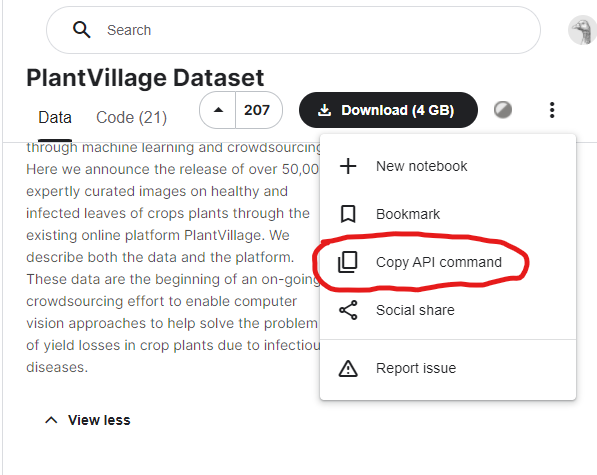

Kemudian API tersebut dicopy kan kesini

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:45<00:00, 81.2MB/s]
100% 2.04G/2.04G [00:45<00:00, 48.5MB/s]


## **Melakukan unzip file yang sudah didownload tadi, dan kemudian hasil ekstrak file tersebut dipindahkan kedalam directory lain yang sudah ditentukan**

In [ ]:
local_zip = '/content/plantvillage-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/dataset_awal')

zip_ref.close()

Setelah diekstrak ke dalam directory tersebut, selanjutnya buat folder baru bernama data_tomat, dan pindahlan dataset tomat ke folder tersebut


# 1.2 DATA EXPLORATION dan VERIFIKASI DATA

melihat jumlah data tomat yang didapatkan dan melihat masing-masing jumlah kategori penyakit tomat dan ukuran dari image yang didapatkan

## **Melihat ukuran semua image yang didapatkan**

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing')
list_tomat

['Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Early_blight']

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___healthy',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Target_Spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Late_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPS

In [ ]:
lebar = []
panjang = []
nama = []

for folder_images in total:
  for dirpath, _, filenames in os.walk(folder_images):
      for path_image in filenames:
          image = os.path.abspath(os.path.join(dirpath, path_image))
          with Image.open(image) as img:
              width, heigth = img.size
              nama.append(path_image)
              lebar.append(width)
              panjang.append(heigth)


In [ ]:
df_ukuran = pd.DataFrame({'File':nama,
                          'Width':lebar,
                          'Height':panjang})
df_ukuran

,File,Width,Height
0,35343df4-2017-47f9-a5ef-d08bd52dfd7c___Crnl_L....,256,256
1,43728975-7569-464b-b67d-a2b3d0f5ddd5___Crnl_L....,256,256
2,63ed021f-afc3-44cc-ab70-0bacc9815d3e___Crnl_L....,256,256
3,82567342-f689-4e61-ac38-b25db55bb684___Crnl_L....,256,256
4,c92cbefd-7687-4a82-a07e-95cf5990c1d9___Crnl_L....,256,256
...,...,...,...
18161,fe856320-407c-4390-9960-a6a539371182___RS_Erly...,256,256
18162,ff422d28-d002-4382-80bf-30f78f66c677___RS_Erly...,256,256
18163,fe46f781-a40c-4c73-9e2c-50872f1ab370___RS_Erly...,256,256
18164,ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly...,256,256


In [ ]:
df_ukuran.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.csv')

In [ ]:
df_ukuran['Width'].value_counts()

256    18166
Name: Width, dtype: int64

In [ ]:
df_ukuran['Height'].value_counts()

256    18166
Name: Height, dtype: int64

# **2. DATA PREPARATION**

Data preparation terdiri dari Data cleaning, Data selection dan Data Transformation

Data Celaning => mengganti nama file disesuaikan dengan folder secara lokal

Data selection => dilakukan pembagian data menjadi val, train, test

Data transformation => melakukan scaling, normalization, augmentasi




# 2.1 DATA CLEANING

buat folder baru yang bernama sesudah_preprocesing yang berisi 3 folder yaitu folder early_blight, sehat, dan folder penyakit lainnya yang berisi gambar daun tomat yang terkena penyakit selain earl_blight


## **Setelah dibuat 3 folder tadi didalam fodler  sesudah_preprocesing, selanjutnya seluruh masing-masing gambar direname berdasarkan nama folder nya (rename secara manual)**

## **Setelah itu buat folder-folder yang dibutuhkan dalam setiap proses, diantaranya folder data_csv_A, data_csv_B, data_csv_C, serta folder model yang didalamnya terdapat fodler modelA, modelB, modelC (buat di google drive)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

## **Mempersiapkan data training, validation, dan testing**

SKENARIO SPLIT DATA :

- A => 80% training : 10% validation : 10% tetsing
- B => 70% training : 15% validation : 15% tetsing

# **A. SKENARIO PEMBAGIAN DATA (80:10:10)**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A", seed=1337, ratio=(.8, .1, .1))

Copying files: 3000 files [01:37, 30.83 files/s]


In [ ]:
os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A')

['train', 'val', 'test']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

In [ ]:
#sel ini happus aja

tomat_path =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/{tomat}')
  tomat_path.append(dir)
  print(f'Jumlah image tomat {tomat} : {len(os.listdir(dir))}')

Jumlah image tomat early_blight : 1000
Jumlah image tomat sehat : 1000
Jumlah image tomat penyakit_lainnya : 1000


In [ ]:
tomat_path

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/penyakit_lainnya']

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (668).JPG,0
1,early_blight (423).JPG,0
2,early_blight (405).JPG,0
3,early_blight (779).JPG,0
4,early_blight (404).JPG,0
...,...,...
295,penyakit_lainnya (583).JPG,2
296,penyakit_lainnya (515).JPG,2
297,penyakit_lainnya (522).JPG,2
298,penyakit_lainnya (497).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv')

In [ ]:
len(df_test)

300

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (668).JPG,0
1,early_blight (423).JPG,0
2,early_blight (405).JPG,0
3,early_blight (779).JPG,0
4,early_blight (404).JPG,0
...,...,...
295,penyakit_lainnya (583).JPG,2
296,penyakit_lainnya (515).JPG,2
297,penyakit_lainnya (522).JPG,2
298,penyakit_lainnya (497).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (674).JPG,0
1,early_blight (449).JPG,0
2,early_blight (548).JPG,0
3,early_blight (693).JPG,0
4,early_blight (381).JPG,0
...,...,...
295,penyakit_lainnya (597).JPG,2
296,penyakit_lainnya (530).JPG,2
297,penyakit_lainnya (608).JPG,2
298,penyakit_lainnya (584).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/val_early_blight.csv')

In [ ]:
len(df_val)

300

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (674).JPG,0
1,early_blight (449).JPG,0
2,early_blight (548).JPG,0
3,early_blight (693).JPG,0
4,early_blight (381).JPG,0
...,...,...
295,penyakit_lainnya (597).JPG,2
296,penyakit_lainnya (530).JPG,2
297,penyakit_lainnya (608).JPG,2
298,penyakit_lainnya (584).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (362).JPG,0
1,early_blight (603).JPG,0
2,early_blight (545).JPG,0
3,early_blight (369).JPG,0
4,early_blight (790).JPG,0
...,...,...
2395,penyakit_lainnya (537).JPG,2
2396,penyakit_lainnya (579).JPG,2
2397,penyakit_lainnya (568).JPG,2
2398,penyakit_lainnya (491).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/train_early_blight.csv')

In [ ]:
len(df_train)

2400

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (362).JPG,0
1,early_blight (603).JPG,0
2,early_blight (545).JPG,0
3,early_blight (369).JPG,0
4,early_blight (790).JPG,0
...,...,...
2395,penyakit_lainnya (537).JPG,2
2396,penyakit_lainnya (579).JPG,2
2397,penyakit_lainnya (568).JPG,2
2398,penyakit_lainnya (491).JPG,2


## **Membuat data total format .csv**

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in total:
  for tomat in os.listdir(i):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i.split('/')[9])
    else:
      names.append(tomat)
      categories.append(i.split('/')[9])
    
df_total = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_total

,filename,category
0,early_blight (797).JPG,early_blight
1,early_blight (579).JPG,early_blight
2,early_blight (466).JPG,early_blight
3,early_blight (361).JPG,early_blight
4,early_blight (845).JPG,early_blight
...,...,...
2995,penyakit_lainnya (579).JPG,penyakit_lainnya
2996,penyakit_lainnya (556).JPG,penyakit_lainnya
2997,penyakit_lainnya (501).JPG,penyakit_lainnya
2998,penyakit_lainnya (558).JPG,penyakit_lainnya


## **Simpan df_total dengan nama total_early_blight.csv**

In [ ]:
df_total.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_early_blight.csv')

In [ ]:
#test load csv

df_total = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_early_blight.csv')
df_total = df_total[['filename','category']] #biar kolom unamed nya ilang
df_total

,filename,category
0,early_blight (797).JPG,early_blight
1,early_blight (579).JPG,early_blight
2,early_blight (466).JPG,early_blight
3,early_blight (361).JPG,early_blight
4,early_blight (845).JPG,early_blight
...,...,...
2995,penyakit_lainnya (579).JPG,penyakit_lainnya
2996,penyakit_lainnya (556).JPG,penyakit_lainnya
2997,penyakit_lainnya (501).JPG,penyakit_lainnya
2998,penyakit_lainnya (558).JPG,penyakit_lainnya


## **Buat grafik perbandingan jumlah dari masing-masing kelas prediksi**

early_blight        1000
sehat               1000
penyakit_lainnya    1000
Name: category, dtype: int64

 Total images:  3000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


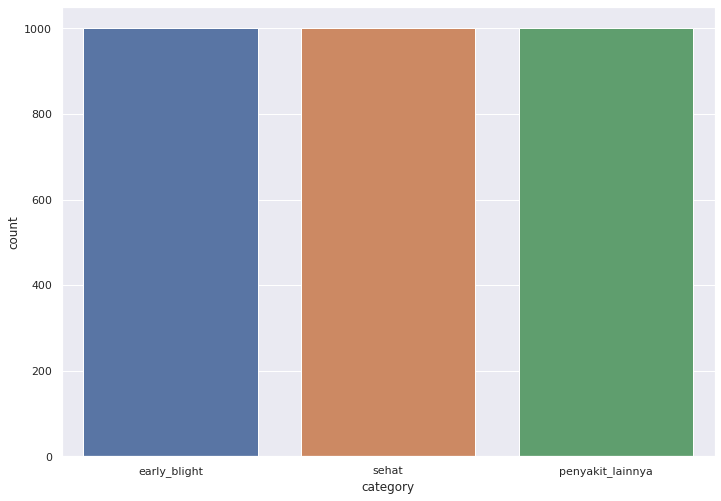

In [ ]:
print(df_total.category.value_counts())
print("\n Total images: ", df_total.shape[0])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df_total.category)
plt.show()

# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 20,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


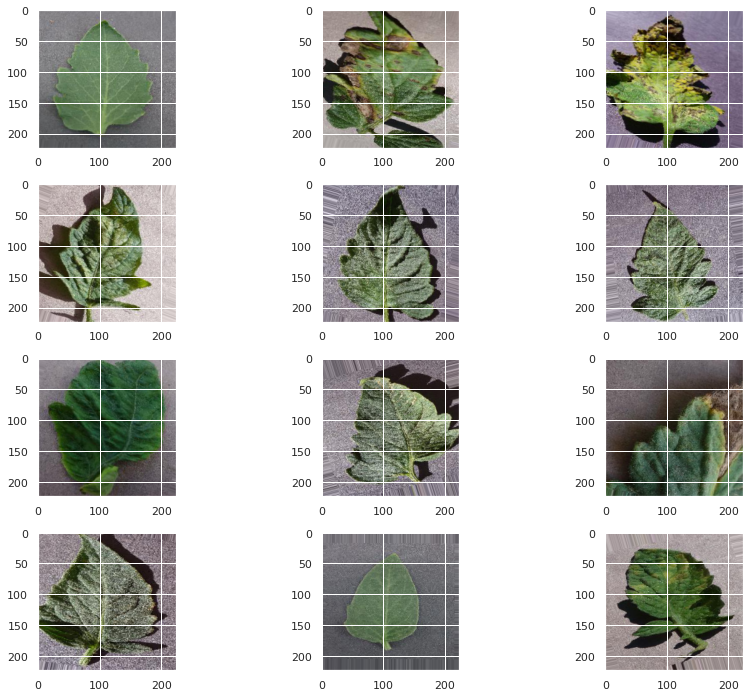

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0.2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001


# **A1. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-1**


====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0,2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(512, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.2)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A1.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 4.4544 - acc: 0.3984
Epoch 1: val_acc improved from -inf to 0.27333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A1.h5
8/8 [==============================] - 71s 4s/step - loss: 4.4544 - acc: 0.3984 - val_loss: 1.4613 - val_acc: 0.2733
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.1378 - acc: 0.5781
Epoch 2: val_acc improved from 0.27333 to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A1.h5
8/8 [==============================] - 26s 3s/step - loss: 1.1378 - acc: 0.5781 - val_loss: 383.9922 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.9281 - acc: 0.6289
Epoch 3: val_acc did not improve from 0.33333
8/8 [==============================] - 15s 2s/step - loss: 0.9281 - acc: 0.6289 - val_loss: 545.8445 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - los

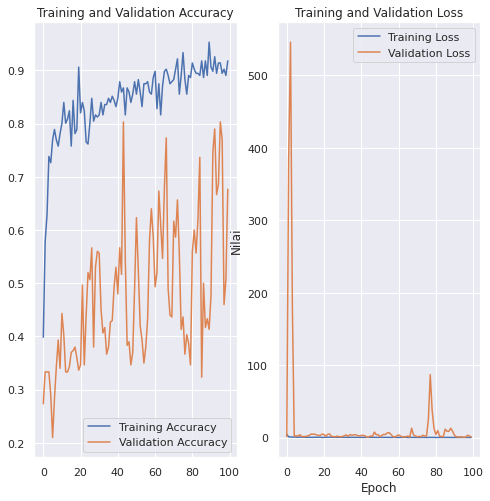

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A1.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A1')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 10s 351ms/step - loss: 0.6120 - acc: 0.8033

 Test accuracy: 0.8033333420753479
Running time: --- 11.342037677764893 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 4s 351ms/step - loss: 0.6577 - acc: 0.7800

 Test accuracy: 0.7799999713897705
Running time: --- 4.030153512954712 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatA.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 17s 70ms/step
[2 0 0 2 0 0 0 0 2 1 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 0 0 2 2 0 1 0 0 0 2 2 0 0 0 1 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 0 2 0 1 1 0 2 2 0 1 0
 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 0 0 0
 2 1 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 0 2 1 2 0 1 0 1 2 2 0 0 2 0 2 2 2 2 2 2
 2 2 2 1]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[80,  5, 15],
       [ 1, 99,  0],
       [31, 14, 55]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


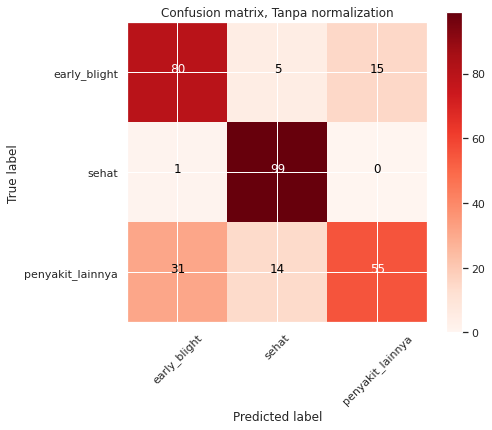

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       100
           1       0.84      0.99      0.91       100
           2       0.79      0.55      0.65       100

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.77       300
weighted avg       0.78      0.78      0.77       300



# **A2. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-2**

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(256, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.5)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A2.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.1827 - acc: 0.3984
Epoch 1: val_acc improved from -inf to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A2.h5
8/8 [==============================] - 57s 3s/step - loss: 1.1827 - acc: 0.3984 - val_loss: 1.0999 - val_acc: 0.3333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.0105 - acc: 0.5078
Epoch 2: val_acc did not improve from 0.33333
8/8 [==============================] - 15s 2s/step - loss: 1.0105 - acc: 0.5078 - val_loss: 1.1052 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.8369 - acc: 0.6094
Epoch 3: val_acc did not improve from 0.33333
8/8 [==============================] - 15s 2s/step - loss: 0.8369 - acc: 0.6094 - val_loss: 1.1215 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.7628 - acc: 0.6523
Epoch 4: val_acc did not improve from 0.33333
8/8 [====================

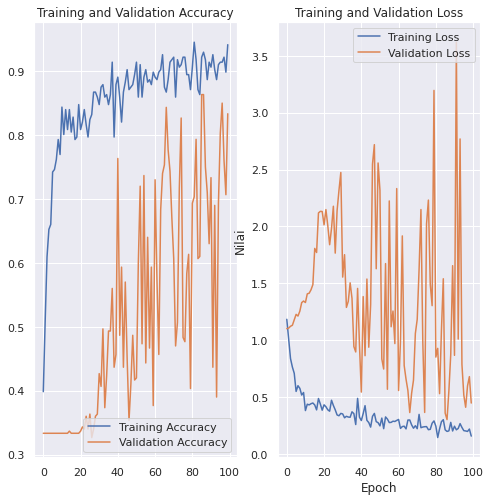

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A2.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A2')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 10s 351ms/step - loss: 0.3577 - acc: 0.8633

 Test accuracy: 0.8633333444595337
Running time: --- 11.289036512374878 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 4s 350ms/step - loss: 0.5595 - acc: 0.8467

 Test accuracy: 0.846666693687439
Running time: --- 5.391427993774414 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatA2.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 19s 68ms/step
[0 0 2 2 0 2 0 2 2 2 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0
 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[72,  0, 28],
       [ 0, 88, 12],
       [ 6,  0, 94]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


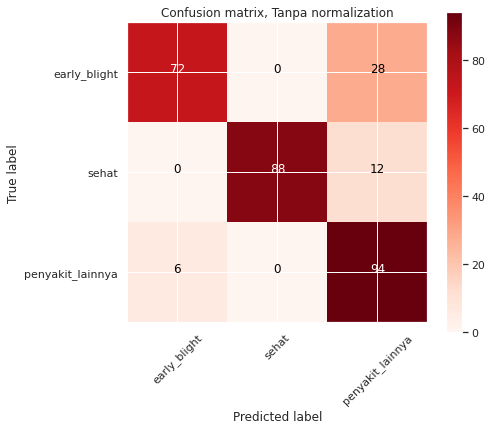

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       100
           1       1.00      0.88      0.94       100
           2       0.70      0.94      0.80       100

    accuracy                           0.85       300
   macro avg       0.87      0.85      0.85       300
weighted avg       0.87      0.85      0.85       300



# **A3. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-3**

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(128, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.7)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A3.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.3556 - acc: 0.4531
Epoch 1: val_acc improved from -inf to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A3.h5
8/8 [==============================] - 233s 19s/step - loss: 1.3556 - acc: 0.4531 - val_loss: 1.1007 - val_acc: 0.3333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.8317 - acc: 0.6289
Epoch 2: val_acc did not improve from 0.33333
8/8 [==============================] - 57s 7s/step - loss: 0.8317 - acc: 0.6289 - val_loss: 1.1045 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.6356 - acc: 0.7031
Epoch 3: val_acc did not improve from 0.33333
8/8 [==============================] - 48s 6s/step - loss: 0.6356 - acc: 0.7031 - val_loss: 1.1183 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.7092 - acc: 0.6406
Epoch 4: val_acc did not improve from 0.33333
8/8 [==================

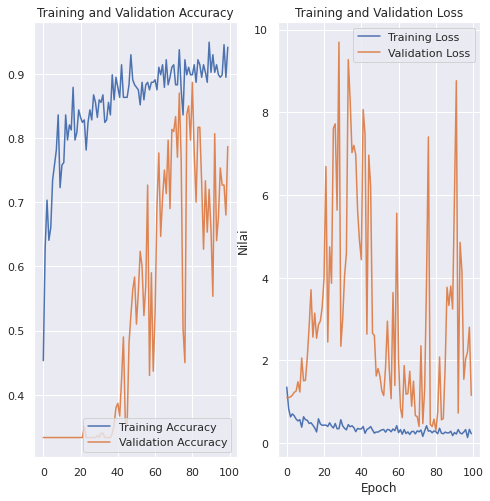

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A3.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_A3')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 9s 357ms/step - loss: 0.3055 - acc: 0.8867

 Test accuracy: 0.8866666555404663
Running time: --- 10.926311254501343 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 43s 5s/step - loss: 0.4895 - acc: 0.8867

 Test accuracy: 0.8866666555404663
Running time: --- 44.202388048172 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatA3.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 18s 69ms/step
[0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[85,  0, 15],
       [ 1, 91,  8],
       [10,  0, 90]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


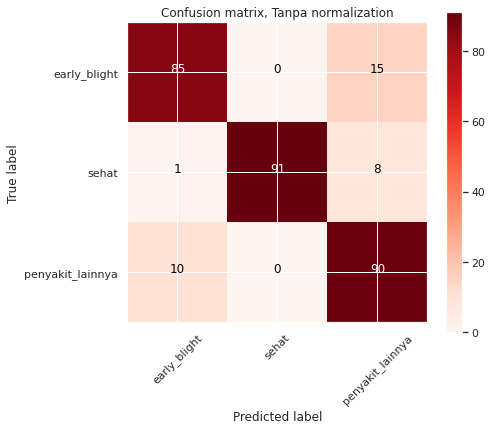

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       1.00      0.91      0.95       100
           2       0.80      0.90      0.85       100

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# **B. SKENARIO PEMBAGIAN DATA (70:15:15)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

## **Mempersiapkan data training, validation, dan testing**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B", seed=1337, ratio=(.7, .15, .15))

Copying files: 3000 files [01:07, 44.12 files/s] 


In [ ]:
os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B')

['train', 'val', 'test']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv')

In [ ]:
len(df_test)

450

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/val_early_blight.csv')

In [ ]:
len(df_val)

450

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/train_early_blight.csv')

In [ ]:
len(df_train)

2100

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 20,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0.2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001


# **B1. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-1**


====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0,2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(512, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.2)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B1.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 3.9236 - acc: 0.5078
Epoch 1: val_acc improved from -inf to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B1.h5
8/8 [==============================] - 65s 3s/step - loss: 3.9236 - acc: 0.5078 - val_loss: 39.0328 - val_acc: 0.3333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.5101 - acc: 0.5664
Epoch 2: val_acc did not improve from 0.33333
8/8 [==============================] - 8s 1s/step - loss: 1.5101 - acc: 0.5664 - val_loss: 219.8607 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.0158 - acc: 0.6289
Epoch 3: val_acc did not improve from 0.33333
8/8 [==============================] - 8s 992ms/step - loss: 1.0158 - acc: 0.6289 - val_loss: 666.9159 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 1.2402 - acc: 0.6016
Epoch 4: val_acc did not improve from 0.33333
8/8 [==============

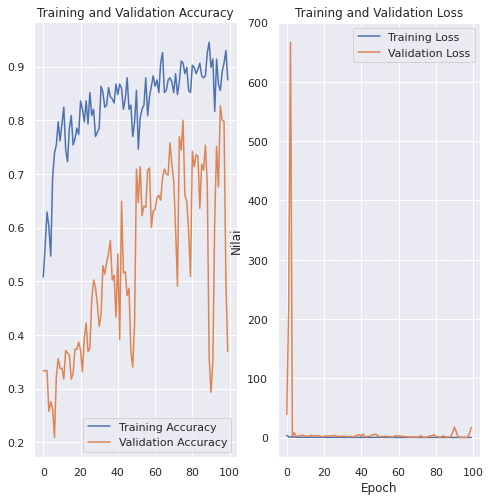

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B1.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/model_B1')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 7s 165ms/step - loss: 0.3446 - acc: 0.8267

 Test accuracy: 0.8266666531562805
Running time: --- 9.673811435699463 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 3s 164ms/step - loss: 0.5549 - acc: 0.8089

 Test accuracy: 0.8088889122009277
Running time: --- 5.390804767608643 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatB.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 14s 41ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 0 0 2 0 0
 2 0 0 1 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 2 0 2 0 0 0 0 0 2 2 0 2 0 2 0 0
 0 0 0 0 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 0 0 2 0 2 0 0 2 0
 0 0 0 2 2 0 2 0 0 2 0 0 2 2 0 2 2 0 2 2 2 0 2 0 2 2 2 2 0 2 2 2 0 0 0 2 2
 0 2 0 2 2 0]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[146,   0,   4],
       [  2, 145,   3],
       [ 76,   1,  73]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


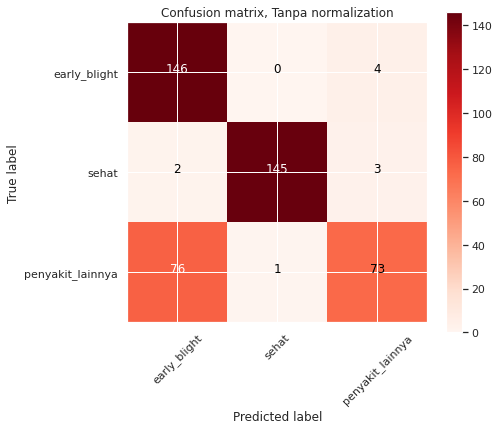

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       150
           1       0.99      0.97      0.98       150
           2       0.91      0.49      0.63       150

    accuracy                           0.81       450
   macro avg       0.85      0.81      0.80       450
weighted avg       0.85      0.81      0.80       450



# **B2. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-2**

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(256, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.5)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B2.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.2150 - acc: 0.3984
Epoch 1: val_acc improved from -inf to 0.36667, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B2.h5
8/8 [==============================] - 41s 3s/step - loss: 1.2150 - acc: 0.3984 - val_loss: 1.0987 - val_acc: 0.3667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.9370 - acc: 0.5469
Epoch 2: val_acc did not improve from 0.36667
8/8 [==============================] - 8s 1s/step - loss: 0.9370 - acc: 0.5469 - val_loss: 1.1012 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.7889 - acc: 0.6445
Epoch 3: val_acc did not improve from 0.36667
8/8 [==============================] - 8s 998ms/step - loss: 0.7889 - acc: 0.6445 - val_loss: 1.1076 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.7083 - acc: 0.6680
Epoch 4: val_acc did not improve from 0.36667
8/8 [===================

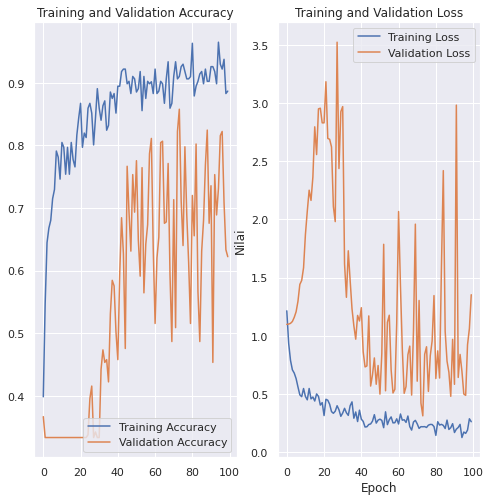

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B2.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B2')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 7s 165ms/step - loss: 0.3128 - acc: 0.8578

 Test accuracy: 0.8577777743339539
Running time: --- 9.719008207321167 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 3s 188ms/step - loss: 0.4552 - acc: 0.8822

 Test accuracy: 0.8822222352027893
Running time: --- 5.311543941497803 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatB2.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 14s 41ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 1
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 0 0
 2 2 2 1 2 2 0 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 2
 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 0 0 2 2 2 2 0 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2
 0 2 0 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[140,   1,   9],
       [  0, 141,   9],
       [ 31,   3, 116]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


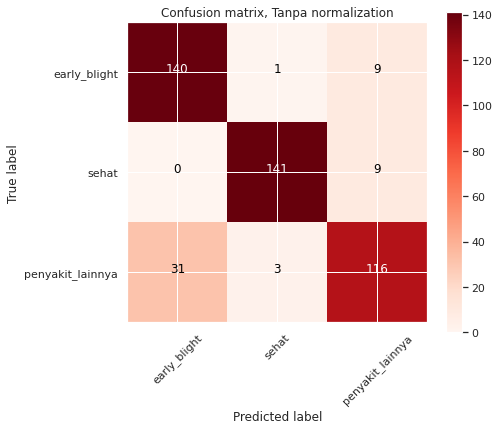

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       150
           1       0.97      0.94      0.96       150
           2       0.87      0.77      0.82       150

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450



# **B3. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-3**

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001

## **Import Model DenseNet264 dan Mengganti Layer Terakhir Model**

In [ ]:
def densenet264(img_shape, n_classes, f=32):
  repetitions = 6, 12, 64, 48
 
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 2*f) #filter 64
      x = bn_rl_conv(x, f, 3)
      tensor = layers.Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = layers.AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = layers.Input(img_shape)
  
  x = layers.Conv2D(64, 7, strides=2, padding='same')(input) #filter, kernel, strides, pading
  x = layers.MaxPool2D(3, strides=2, padding='same')(x) #kernel size, stride, pading
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  #Tambahan Layer
  x = layers.GlobalAvgPool2D()(d)

  # Flattening
  x = layers.Flatten()(x)

  # Fully Connected Layer
  x = layers.Dense(128, activation='relu')(x)

  # Dropout
  x = layers.Dropout(0.7)(x)
  
  output = layers.Dense(n_classes, activation='softmax')(x)
  
  model = tf.keras.Model(input, output)
  return model

In [ ]:
input_shape = 224, 224, 3
n_classes = 3

K.clear_session()
model = densenet264(input_shape, n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B3.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.5183 - acc: 0.4023
Epoch 1: val_acc improved from -inf to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B3.h5
8/8 [==============================] - 79s 3s/step - loss: 1.5183 - acc: 0.4023 - val_loss: 1.0988 - val_acc: 0.3333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.8996 - acc: 0.5859
Epoch 2: val_acc did not improve from 0.33333
8/8 [==============================] - 8s 1s/step - loss: 0.8996 - acc: 0.5859 - val_loss: 1.1004 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.6340 - acc: 0.7227
Epoch 3: val_acc did not improve from 0.33333
8/8 [==============================] - 8s 1s/step - loss: 0.6340 - acc: 0.7227 - val_loss: 1.1163 - val_acc: 0.3333
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.6721 - acc: 0.6914
Epoch 4: val_acc did not improve from 0.33333
8/8 [======================

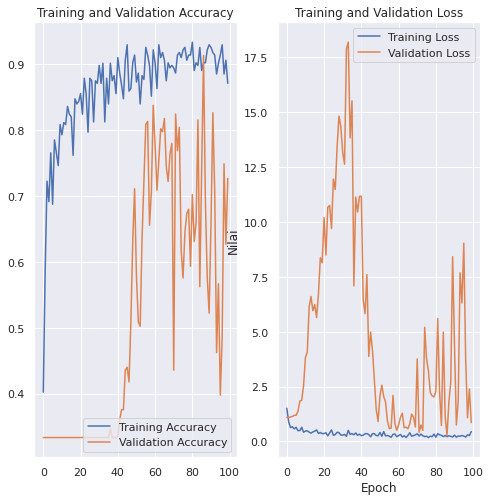

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B3.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelB/model_B3')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 8s 167ms/step - loss: 0.2787 - acc: 0.9133

 Test accuracy: 0.9133333563804626
Running time: --- 7.817355632781982 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 3s 169ms/step - loss: 0.6074 - acc: 0.9044

 Test accuracy: 0.9044444561004639
Running time: --- 2.9372658729553223 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model/modelA/test_preproc_projek_tomatB3.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 15s 45ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2
 2 0 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2
 0 0 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[138,   0,  12],
       [  0, 142,   8],
       [ 23,   0, 127]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


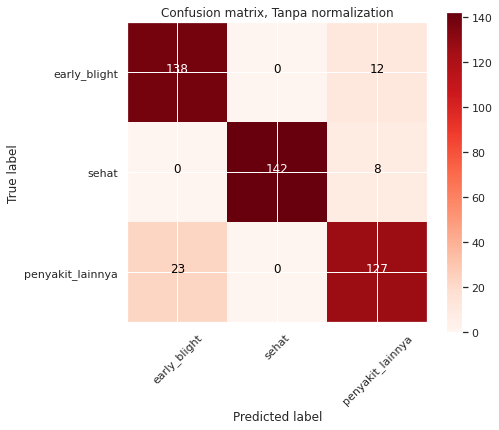

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       150
           1       1.00      0.95      0.97       150
           2       0.86      0.85      0.86       150

    accuracy                           0.90       450
   macro avg       0.91      0.90      0.91       450
weighted avg       0.91      0.90      0.91       450

